In [2]:
# installing 1.0.3 because this version of pandas supports write to s3
!pip install pandas==1.0.3

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
# This path will be active after the launch of the hackathon / day-day-up-unsw / s3://tf-trachack-notebooks/day-day-up-unsw/jupyter/jovyan/
teamname = 'day-day-up-unsw' #'trachack-a-groups-admin-py-tracfone'
data_folder='s3://tf-trachack-data/212/'
# change root_folder to your team's root folder
# s3://tf-trachack-notebooks/<this should be replaced by team name as provided in EMAIL>/jupyter/jovyan/
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from pandas import to_datetime

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer,SimpleImputer
from scipy.interpolate import lagrange
from sklearn import metrics
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

In [5]:
upgrades=pd.read_csv(data_folder+"data/dev/upgrades.csv")
phone_info=pd.read_csv(data_folder+"data/dev/phone_info.csv")
customer_info=pd.read_csv(data_folder+"data/dev/customer_info.csv")

In [6]:
upgrade_phone_info = pd.merge(upgrades, phone_info, on = 'line_id', how = 'inner')
upgrade_customer_info = pd.merge(upgrades, customer_info, on = 'line_id', how = 'inner')

In [7]:
upgrades_eval=pd.read_csv(data_folder+"data/eval/upgrades.csv")
phone_info_eval=pd.read_csv(data_folder+"data/eval/phone_info.csv")
customer_info_eval=pd.read_csv(data_folder+"data/eval/customer_info.csv")

In [8]:
upgrade_phone_info_eval = pd.merge(upgrades_eval, phone_info_eval, on = 'line_id', how = 'inner')
upgrade_customer_info_eval = pd.merge(upgrades_eval, customer_info_eval, on = 'line_id', how = 'inner')

In [385]:
phone_info.head(5)

,line_id,cpu_cores,expandable_storage,gsma_device_type,gsma_model_name,gsma_operating_system,internal_storage_capacity,lte,lte_advanced,lte_category,manufacturer,os_family,os_name,os_vendor,os_version,sim_size,total_ram,touch_screen,wi_fi,year_released
0,8803884c-38df-4243-a522-891c2117790c,4,0.0,Smartphone,iPhone 7 (A1779),iOS,32/128/256,1.0,1.0,9.0,Apple,iOS,iOS,Apple,10,Nano,2048,1.0,1.0,2016.0
1,75b2d7a7-c4f8-4cf2-af32-ab25b5dffacc,8,1.0,Smartphone,SM-N975U,Android,256,1.0,1.0,20.0,Samsung,Android,Android,Google,9,Nano,8192,1.0,1.0,2019.0
2,7f10447b-7ce6-4297-9011-8273b11354ee,2+4,0.0,Smartphone,iPhone XR (A1984),iOS,64/128/256,1.0,1.0,12.0,Apple,iOS,iOS,Apple,12,Nano,3072,1.0,1.0,2018.0
3,50579bcb-6413-4dfb-865d-f11d3adad1fe,NaN,NaN,Smartphone,SM-G986U1,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c56e177c-0514-493c-bbc2-7e2c9308aa73,NaN,NaN,Smartphone,LG L722DL,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
phone_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55868 entries, 0 to 55867
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   line_id                    55868 non-null  object 
 1   cpu_cores                  33740 non-null  object 
 2   expandable_storage         33241 non-null  float64
 3   gsma_device_type           44297 non-null  object 
 4   gsma_model_name            44297 non-null  object 
 5   gsma_operating_system      44297 non-null  object 
 6   internal_storage_capacity  33399 non-null  object 
 7   lte                        33831 non-null  float64
 8   lte_advanced               31224 non-null  float64
 9   lte_category               30927 non-null  float64
 10  manufacturer               33814 non-null  object 
 11  os_family                  33801 non-null  object 
 12  os_name                    33803 non-null  object 
 13  os_vendor                  33801 non-null  obj

In [12]:
upgrade_phone_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55868 entries, 0 to 55867
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   line_id                    55868 non-null  object 
 1   date_observed              55868 non-null  object 
 2   upgrade                    55868 non-null  object 
 3   cpu_cores                  33740 non-null  object 
 4   expandable_storage         33241 non-null  float64
 5   gsma_device_type           44297 non-null  object 
 6   gsma_model_name            44297 non-null  object 
 7   gsma_operating_system      44297 non-null  object 
 8   internal_storage_capacity  33399 non-null  object 
 9   lte                        33831 non-null  float64
 10  lte_advanced               31224 non-null  float64
 11  lte_category               30927 non-null  float64
 12  manufacturer               33814 non-null  object 
 13  os_family                  33801 non-null  obj

In [14]:
upgrade_phone_info_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37155 entries, 0 to 37154
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   line_id                    37155 non-null  object 
 1   date_observed              37155 non-null  object 
 2   cpu_cores                  22575 non-null  object 
 3   expandable_storage         22249 non-null  float64
 4   gsma_device_type           29555 non-null  object 
 5   gsma_model_name            29555 non-null  object 
 6   gsma_operating_system      29555 non-null  object 
 7   internal_storage_capacity  22344 non-null  object 
 8   lte                        22646 non-null  float64
 9   lte_advanced               20937 non-null  float64
 10  lte_category               20719 non-null  float64
 11  manufacturer               22646 non-null  object 
 12  os_family                  22619 non-null  object 
 13  os_name                    22623 non-null  obj

In [387]:
upgrade_phone_info.loc[:, 'cpu_cores']

0          4
1        2+4
2          4
3          4
4          8
        ... 
55863    NaN
55864      4
55865    NaN
55866    4+4
55867    NaN
Name: cpu_cores, Length: 55868, dtype: object

In [388]:
upgrade_phone_info.loc[:, 'cpu_cores'].value_counts()

4        13370
2         7772
2+4       5943
8         2430
4+4       1499
2+6       1238
6+2        949
2+2        465
1+3+4       43
2+2+4       21
4+2          4
1            4
1+2+4        2
Name: cpu_cores, dtype: int64

In [389]:
upgrade_phone_info_eval.loc[:, 'cpu_cores']

0          4
1        2+4
2          2
3        NaN
4          4
        ... 
37150    NaN
37151    NaN
37152      4
37153      2
37154      4
Name: cpu_cores, Length: 37155, dtype: object

In [390]:
upgrade_phone_info_eval.head(5)

,line_id,date_observed,cpu_cores,expandable_storage,gsma_device_type,gsma_model_name,gsma_operating_system,internal_storage_capacity,lte,lte_advanced,...,manufacturer,os_family,os_name,os_vendor,os_version,sim_size,total_ram,touch_screen,wi_fi,year_released
0,584f0d75-5897-4e56-b475-0b3adf1aeb07,2021-03-10,4,0.0,Smartphone,iPhone 7 (A1660),iOS,32/128/256,1.0,1.0,...,Apple,iOS,iOS,Apple,10,Nano,2048,1.0,1.0,2016.0
1,e879756a-daff-4f72-9206-d96009861ac1,2021-03-10,2+4,0.0,Smartphone,iPhone X (A1901),iOS,64/256,1.0,1.0,...,Apple,iOS,iOS,Apple,11_0_1,Nano,3072,1.0,1.0,2017.0
2,cbb0795d-716a-44f1-bc82-f8f8cb5db002,2021-03-10,2,0.0,Smartphone,iPhone 6S Plus (A1634),iOS,16/32/64/128,1.0,1.0,...,Apple,iOS,iOS,Apple,9,Nano,2048,1.0,1.0,2015.0
3,e1e914fd-1e04-4148-9251-ed6a4dd6d3e7,2021-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1987025d-39be-4120-a09a-8d89c0e8d151,2021-03-14,4,1.0,Smartphone,SM-S727VL,Android,16,1.0,1.0,...,Samsung,Android,Android,Google,6.0.1,Nano,2048,1.0,1.0,2017.0


# Data processing
## cpu_cores

In [391]:
#Train
upgrade_phone_info.loc[:, 'cpu_cores'].fillna('0', inplace=True)
upgrade_phone_info.loc[:, 'cpu_cores'] = upgrade_phone_info.loc[:, 'cpu_cores'].apply(lambda x: sum(map(int, x.split('+'))))
upgrade_phone_info.loc[:, 'cpu_cores'].replace(0, np.nan, inplace=True)
# 缺失值处理
upgrade_phone_info.loc[:, 'cpu_cores'].fillna(upgrade_phone_info.loc[:, 'cpu_cores'].mean(), inplace=True)
# st=StandardScaler()
# data=st.fit_transform(upgrade_phone_info_eval.loc[:,['cpu_cores']])
# upgrade_phone_info.loc[:, ['cpu_cores']] = data

#Eval
upgrade_phone_info_eval.loc[:, 'cpu_cores'].fillna('0', inplace=True)
upgrade_phone_info_eval.loc[:, 'cpu_cores'] = upgrade_phone_info_eval.loc[:, 'cpu_cores'].apply(lambda x: sum(map(int, x.split('+'))))
upgrade_phone_info_eval.loc[:, 'cpu_cores'].replace(0, np.nan, inplace=True)
# 缺失值处理
upgrade_phone_info_eval.loc[:, 'cpu_cores'].fillna(upgrade_phone_info_eval.loc[:, 'cpu_cores'].mean(), inplace=True)
# st=StandardScaler()
# data=st.fit_transform(upgrade_phone_info_eval.loc[:,['cpu_cores']])
# upgrade_phone_info_eval.loc[:, ['cpu_cores']] = data

In [392]:
#Train
st=StandardScaler()
data=st.fit_transform(upgrade_phone_info.loc[:,['cpu_cores']])
upgrade_phone_info.loc[:, ['cpu_cores']] = data

#Eval
st=StandardScaler()
data=st.fit_transform(upgrade_phone_info_eval.loc[:,['cpu_cores']])
upgrade_phone_info_eval.loc[:, ['cpu_cores']] = data

In [393]:
upgrade_phone_info.head(5)

,line_id,date_observed,upgrade,cpu_cores,expandable_storage,gsma_device_type,gsma_model_name,gsma_operating_system,internal_storage_capacity,lte,...,manufacturer,os_family,os_name,os_vendor,os_version,sim_size,total_ram,touch_screen,wi_fi,year_released
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,-0.393453,1.0,Smartphone,SM-S327VL,Android,16,1.0,...,Samsung,Android,Android,Google,6.0.1,Nano,1536,1.0,1.0,2017.0
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,0.867001,0.0,Smartphone,iPhone XR (A1984),iOS,64/128/256,1.0,...,Apple,iOS,iOS,Apple,12,Nano,3072,1.0,1.0,2018.0
2,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,-0.393453,0.0,Smartphone,iPhone 7 (A1660),iOS,32/128/256,1.0,...,Apple,iOS,iOS,Apple,10,Nano,2048,1.0,1.0,2016.0
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no,-0.393453,0.0,Smartphone,iPhone 7 (A1660),iOS,32/128/256,1.0,...,Apple,iOS,iOS,Apple,10,Nano,2048,1.0,1.0,2016.0
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes,2.127454,1.0,Smartphone,SM-G965U,Android,64,1.0,...,Samsung,Android,Android,Google,8,Nano,6144,1.0,1.0,2018.0


In [394]:
# 删除多余的列
# upgrade_phone_info.columns
# c1 = cl.delete()
train_set = upgrade_phone_info[['line_id', 'cpu_cores']]
#  = upgrade_phone_info.drop(columns=c1)
# upgrade_phone_info

In [395]:
# 删除多余的列
eval_set = upgrade_phone_info_eval[['line_id', 'cpu_cores']]
# c1 = cl.delete([0, 3])
# c1
# upgrade_phone_info_eval = upgrade_phone_info.drop(columns=c1)
# upgrade_phone_info_eval

## total_ram

In [396]:
upgrade_phone_info['total_ram'].value_counts()

2048               18966
3072                6236
4096                3401
1024                2140
6144                 870
1536                 637
512                  450
8192                 228
6144/8192            200
5632                 167
3072/4096             59
12288                 55
8                     43
4096/6144             42
5415                  34
256                   31
7680                  16
2048/3072             15
2560                  12
1096/6144              6
4096/6144/8192         5
32                     3
1843                   2
128                    2
768                    2
8192/12288             2
2048/4096              2
3072/4096/6144         2
6144/8192/12288        2
1024/2048              1
4                      1
Name: total_ram, dtype: int64

In [397]:
phone_columns = upgrade_phone_info.columns
phone_columns_eval = upgrade_phone_info_eval.columns

In [398]:
upgrade_phone_info.loc[:, ['total_ram']] = upgrade_phone_info.loc[:, ['total_ram']].fillna("NEW")
upgrade_phone_info_eval.loc[:, ['total_ram']] = upgrade_phone_info_eval.loc[:, ['total_ram']].fillna("NEW")
upgrade_phone_info.loc[:, ['gsma_model_name']] = upgrade_phone_info.loc[:, ['gsma_model_name']].fillna("NEW")
upgrade_phone_info_eval.loc[:, ['gsma_model_name']] = upgrade_phone_info_eval.loc[:, ['gsma_model_name']].fillna("NEW")
upgrade_phone_info.loc[:, ['manufacturer']] = upgrade_phone_info.loc[:, ['manufacturer']].fillna("NEW")
upgrade_phone_info_eval.loc[:, ['manufacturer']] = upgrade_phone_info_eval.loc[:, ['manufacturer']].fillna("NEW")
upgrade_phone_info.loc[:, ['internal_storage_capacity']] = upgrade_phone_info.loc[:, ['internal_storage_capacity']].fillna("NEW")
upgrade_phone_info_eval.loc[:, ['internal_storage_capacity']] = upgrade_phone_info_eval.loc[:, ['internal_storage_capacity']].fillna("NEW")
upgrade_phone_info.loc[:, ['os_version']] = upgrade_phone_info.loc[:, ['os_version']].fillna("NEW")
upgrade_phone_info_eval.loc[:, ['os_version']] = upgrade_phone_info_eval.loc[:, ['os_version']].fillna("NEW")

#Train (total_ram)

# oh = OneHotEncoder(sparse = False)
# contents = oh.fit_transform(upgrade_phone_info.loc[:, ['total_ram']])
# pca = PCA(n_components=0.95)
# data = pca.fit_transform(contents)

# n_samples = data.shape[1]
# total_ram_field = []
# for i in range(n_samples):
#     s = 'total_ram_' + str(i)
#     total_ram_field.append(s)
    
# for i in range(n_samples):
#     upgrade_phone_info[total_ram_field[i]] = data[:, i]

# drop columns
upgrade_phone_info = upgrade_phone_info.drop(columns=['total_ram'])
    
#Eval
# oh = OneHotEncoder(sparse = False)
# contents = oh.fit_transform(upgrade_phone_info_eval.loc[:, ['total_ram']])
# pca = PCA(n_components=0.95)
# data = pca.fit_transform(contents)

# n_samples = data.shape[1]
# total_ram_field = []
# for i in range(n_samples):
#     s = 'total_ram_' + str(i)
#     total_ram_field.append(s)
    
# for i in range(n_samples):
#     upgrade_phone_info_eval[total_ram_field[i]] = data[:, i]

# drop columns
upgrade_phone_info_eval = upgrade_phone_info_eval.drop(columns=['total_ram'])

#Train (gsma_model_name) （时间太长，不能不用pca，否则分数降低太多） （好像不错，但是我这边结果不行）

# oh = OneHotEncoder(sparse = False)
# contents = oh.fit_transform(upgrade_phone_info.loc[:, ['gsma_model_name']])
# pca = PCA(n_components=0.95)
# data = pca.fit_transform(contents)

# n_samples = data.shape[1]
# total_ram_field = []
# for i in range(n_samples):
#     s = 'gsma_model_name_' + str(i)
#     total_ram_field.append(s)
    
# for i in range(n_samples):
#     upgrade_phone_info[total_ram_field[i]] = data[:, i]
# drop columns
upgrade_phone_info = upgrade_phone_info.drop(columns=['gsma_model_name'])
    
#Eval
# oh = OneHotEncoder(sparse = False)
# contents = oh.fit_transform(upgrade_phone_info_eval.loc[:, ['gsma_model_name']])
# pca = PCA(n_components=0.95)
# data = pca.fit_transform(contents)

# n_samples = data.shape[1]
# gsma_model_name_field = []
# for i in range(n_samples):
#     s = 'gsma_model_name_' + str(i)
#     gsma_model_name_field.append(s)
    
# for i in range(n_samples):
#     upgrade_phone_info_eval[gsma_model_name_field[i]] = data[:, i]
# drop columns
upgrade_phone_info_eval = upgrade_phone_info_eval.drop(columns=['gsma_model_name'])


#Train (manufacturer)  (0.926 - 10维度, 不定维度,0.9264)

# oh = OneHotEncoder(sparse = False)
# contents = oh.fit_transform(upgrade_phone_info.loc[:, ['manufacturer']])
# pca = PCA(n_components=10)
# data = pca.fit_transform(contents)

# n_samples = data.shape[1]
# manufacturer_field = []
# for i in range(n_samples):
#     s = 'manufacturer_' + str(i)
#     manufacturer_field.append(s)
    
# for i in range(n_samples):
#     upgrade_phone_info[manufacturer_field[i]] = data[:, i]
# drop columns
upgrade_phone_info = upgrade_phone_info.drop(columns=['manufacturer'])
    
#Eval
# oh = OneHotEncoder(sparse = False)
# contents = oh.fit_transform(upgrade_phone_info_eval.loc[:, ['manufacturer']])
# pca = PCA(n_components=10)
# data = pca.fit_transform(contents)

# n_samples = data.shape[1]
# manufacturer_field = []
# for i in range(n_samples):
#     s = 'manufacturer_' + str(i)
#     manufacturer_field.append(s)
    
# for i in range(n_samples):
#     upgrade_phone_info_eval[manufacturer_field[i]] = data[:, i]

# drop columns
upgrade_phone_info_eval = upgrade_phone_info_eval.drop(columns=['manufacturer'])
    
#Train (internal_storage_capacity)

# oh = OneHotEncoder(sparse = False)
# contents = oh.fit_transform(upgrade_phone_info.loc[:, ['internal_storage_capacity']])
# pca = PCA(n_components=0.95)
# data = pca.fit_transform(contents)

# n_samples = data.shape[1]
# internal_storage_capacity_field = []
# for i in range(n_samples):
#     s = 'internal_storage_capacity_' + str(i)
#     internal_storage_capacity_field.append(s)
    
# for i in range(n_samples):
#     upgrade_phone_info[internal_storage_capacity_field[i]] = data[:, i]
# drop columns
upgrade_phone_info = upgrade_phone_info.drop(columns=['internal_storage_capacity'])
    
#Eval
# oh = OneHotEncoder(sparse = False)
# contents = oh.fit_transform(upgrade_phone_info_eval.loc[:, ['internal_storage_capacity']])
# pca = PCA(n_components=0.95)
# data = pca.fit_transform(contents)

# n_samples = data.shape[1]
# internal_storage_capacity_field = []
# for i in range(n_samples):
#     s = 'internal_storage_capacity_' + str(i)
#     internal_storage_capacity_field.append(s)
    
# for i in range(n_samples):
#     upgrade_phone_info_eval[internal_storage_capacity_field[i]] = data[:, i]

# drop columns
upgrade_phone_info_eval = upgrade_phone_info_eval.drop(columns=['internal_storage_capacity'])
    
    
#Train (os_version) (暂时排除)

# oh = OneHotEncoder(sparse = False)
# contents = oh.fit_transform(upgrade_phone_info.loc[:, ['os_version']])
# pca = PCA(n_components=0.95)
# data = pca.fit_transform(contents)

# n_samples = data.shape[1]
# os_version_field = []
# for i in range(n_samples):
#     s = 'os_version_' + str(i)
#     os_version_field.append(s)
    
# for i in range(n_samples):
#     upgrade_phone_info[os_version_field[i]] = data[:, i]
# drop columns
upgrade_phone_info = upgrade_phone_info.drop(columns=['os_version'])
    
# #Eval
# oh = OneHotEncoder(sparse = False)
# contents = oh.fit_transform(upgrade_phone_info_eval.loc[:, ['os_version']])
# pca = PCA(n_components=0.95)
# data = pca.fit_transform(contents)

# n_samples = data.shape[1]
# os_version_field = []
# for i in range(n_samples):
#     s = 'os_version_' + str(i)
#     os_version_field.append(s)
    
# for i in range(n_samples):
#     upgrade_phone_info_eval[os_version_field[i]] = data[:, i]

# drop columns
upgrade_phone_info_eval = upgrade_phone_info_eval.drop(columns=['os_version'])
    
    

### 两个时间都要
    
# Train 缺失值处理 year_released
data = upgrade_phone_info.loc[:, ['year_released']]
im = SimpleImputer(missing_values=np.nan, strategy='median')
# im = KNNImputer(n_neighbors=2)
data = im.fit_transform(data)
upgrade_phone_info.loc[:, ['year_released']] = data
# Calculate the time difference
upgrade_phone_info['year_released_1'] = upgrade_phone_info.loc[:, ['year_released']].apply(lambda x:2021-x)
st=StandardScaler()
data=st.fit_transform(upgrade_phone_info.loc[:,['year_released_1']])
upgrade_phone_info['year_released_1'] = data

#Eval
data = upgrade_phone_info_eval.loc[:, ['year_released']]
im = SimpleImputer(missing_values=np.nan, strategy='median')
# im = KNNImputer(n_neighbors=2)
data = im.fit_transform(data)
upgrade_phone_info_eval.loc[:, ['year_released']] = data
# Calculate the time difference
upgrade_phone_info_eval['year_released_1'] = upgrade_phone_info_eval.loc[:, ['year_released']].apply(lambda x:2021-x)
st=StandardScaler()
data=st.fit_transform(upgrade_phone_info_eval.loc[:,['year_released_1']])
upgrade_phone_info_eval['year_released_1'] = data

# 光三个特征是0.920
# 0.930 0.921 0.929，0.927
# 0.929 0.925，0.926不算时间差
#Train 缺失值处理 year_released


# Calculate the time difference
upgrade_phone_info.loc[:, ['year_released']] = upgrade_phone_info.loc[:, ['year_released']].apply(lambda x: x)
st=StandardScaler()
data=st.fit_transform(upgrade_phone_info.loc[:,['year_released']])
upgrade_phone_info.loc[:, ['year_released']] = data

#Eval

# Calculate the time difference
upgrade_phone_info_eval.loc[:, ['year_released']] = upgrade_phone_info_eval.loc[:, ['year_released']].apply(lambda x:x)
st=StandardScaler()
data=st.fit_transform(upgrade_phone_info_eval.loc[:,['year_released']])
upgrade_phone_info_eval.loc[:, ['year_released']] = data


#Train 缺失值处理 lte_category
data = upgrade_phone_info.loc[:, ['lte_category']]
im = SimpleImputer(missing_values=np.nan, strategy='median')
# im = KNNImputer(n_neighbors=2)
data = im.fit_transform(data)
upgrade_phone_info.loc[:, ['lte_category']] = data
st=StandardScaler()
data=st.fit_transform(upgrade_phone_info.loc[:,['lte_category']])
upgrade_phone_info.loc[:, ['lte_category']] = data

#Eval
data = upgrade_phone_info_eval.loc[:, ['lte_category']]
im = SimpleImputer(missing_values=np.nan, strategy='median')
# im = KNNImputer(n_neighbors=2)
data = im.fit_transform(data)
upgrade_phone_info_eval.loc[:, ['lte_category']] = data
st=StandardScaler()
data=st.fit_transform(upgrade_phone_info_eval.loc[:,['lte_category']])
upgrade_phone_info_eval.loc[:, ['lte_category']] = data

# to_csv

In [399]:
upgrade_phone_info.head(5)

,line_id,date_observed,upgrade,cpu_cores,expandable_storage,gsma_device_type,gsma_operating_system,lte,lte_advanced,lte_category,os_family,os_name,os_vendor,sim_size,touch_screen,wi_fi,year_released,year_released_1
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,-0.393453,1.0,Smartphone,Android,1.0,1.0,4.0,Android,Android,Google,Nano,1.0,1.0,0.529910,-0.529910
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,0.867001,0.0,Smartphone,iOS,1.0,1.0,12.0,iOS,iOS,Apple,Nano,1.0,1.0,1.384828,-1.384828
2,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,-0.393453,0.0,Smartphone,iOS,1.0,1.0,9.0,iOS,iOS,Apple,Nano,1.0,1.0,-0.325009,0.325009
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no,-0.393453,0.0,Smartphone,iOS,1.0,1.0,9.0,iOS,iOS,Apple,Nano,1.0,1.0,-0.325009,0.325009
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes,2.127454,1.0,Smartphone,Android,1.0,1.0,18.0,Android,Android,Google,Nano,1.0,1.0,1.384828,-1.384828


In [400]:
upgrade_phone_info.describe()

,cpu_cores,expandable_storage,lte,lte_advanced,lte_category,touch_screen,wi_fi,year_released,year_released_1
count,5.586800e+04,33241.000000,33831.000000,31224.000000,55868.000000,33853.000000,33819.000000,5.586800e+04,5.586800e+04
mean,1.699157e-16,0.345056,0.997694,0.984339,8.987327,0.985407,0.998965,-9.264953e-15,1.714737e-16
std,1.000009e+00,0.475394,0.047962,0.124162,2.956353,0.119917,0.032154,1.000009e+00,1.000009e+00
min,-2.284133e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.454523e+00,-2.239747e+00
25%,-3.934527e-01,0.000000,1.000000,1.000000,9.000000,1.000000,1.000000,-3.250094e-01,-5.299096e-01
50%,0.000000e+00,0.000000,1.000000,1.000000,9.000000,1.000000,1.000000,-3.250094e-01,3.250094e-01
75%,0.000000e+00,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,5.299096e-01,3.250094e-01
max,2.127454e+00,1.000000,1.000000,1.000000,21.000000,1.000000,1.000000,2.239747e+00,5.454523e+00


In [401]:
# 0   line_id                    55868 non-null  object 
#  1   cpu_cores                  33740 non-null  object 
#  2   expandable_storage         33241 non-null  float64   
#  3   gsma_device_type           44297 non-null  object 
#  4   gsma_model_name            44297 non-null  object     yes
#  5   gsma_operating_system      44297 non-null  object 
#  6   internal_storage_capacity  33399 non-null  object     yes
#  7   lte                        33831 non-null  float64
#  8   lte_advanced               31224 non-null  float64
#  9   lte_category               30927 non-null  float64    yes
#  10  manufacturer               33814 non-null  object     yes -
#  11  os_family                  33801 non-null  object 
#  12  os_name                    33803 non-null  object 
#  13  os_vendor                  33801 non-null  object
#  14  os_version                 33649 non-null  object     yes 
#  15  sim_size                   32473 non-null  object 
#  16  total_ram                  33632 non-null  object 
#  17  touch_screen               33853 non-null  float64
#  18  wi_fi                      33819 non-null  float64
#  19  year_released              33849 non-null  float64
# dtypes: float64(7), object(13)

In [402]:
upgrade_phone_info = upgrade_phone_info.drop(columns=['date_observed', 'upgrade', 'expandable_storage', 'gsma_device_type', 'gsma_operating_system', 'lte', 'lte_advanced', 'touch_screen', 'wi_fi', 'os_family', 'os_name', 'os_vendor', 'sim_size'])
upgrade_phone_info

,line_id,cpu_cores,lte_category,year_released,year_released_1
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,-0.393453,4.0,0.529910,-0.529910
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,0.867001,12.0,1.384828,-1.384828
2,dd3a01a3-7baf-4605-9799-ce434328a20d,-0.393453,9.0,-0.325009,0.325009
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,-0.393453,9.0,-0.325009,0.325009
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2.127454,18.0,1.384828,-1.384828
...,...,...,...,...,...
55863,f89b108a-f453-4419-a4dc-5bf8e1cd1f1a,0.000000,9.0,-0.325009,0.325009
55864,b703f1d4-57ba-48b6-8adf-46d7aba6a406,-0.393453,9.0,-0.325009,0.325009
55865,e3b2212c-906e-4a8f-8307-6b88fc64d7a0,0.000000,9.0,-0.325009,0.325009
55866,828df9bf-279c-47c3-96c2-92177a50b8fd,2.127454,18.0,1.384828,-1.384828


In [403]:
upgrade_phone_info_eval = upgrade_phone_info_eval.drop(columns=['date_observed', 'expandable_storage', 'gsma_device_type', 'gsma_operating_system', 'lte', 'lte_advanced', 'touch_screen', 'wi_fi', 'os_family', 'os_name', 'os_vendor', 'sim_size'])
upgrade_phone_info_eval

,line_id,cpu_cores,lte_category,year_released,year_released_1
0,584f0d75-5897-4e56-b475-0b3adf1aeb07,-0.393438,9.0,-0.321199,0.321199
1,e879756a-daff-4f72-9206-d96009861ac1,0.858498,12.0,0.529236,-0.529236
2,cbb0795d-716a-44f1-bc82-f8f8cb5db002,-1.645374,6.0,-1.171635,1.171635
3,e1e914fd-1e04-4148-9251-ed6a4dd6d3e7,0.000000,9.0,-0.321199,0.321199
4,1987025d-39be-4120-a09a-8d89c0e8d151,-0.393438,4.0,0.529236,-0.529236
...,...,...,...,...,...
37150,bca0aa56-6582-4d01-b67a-3cf8a10c7632,0.000000,9.0,-0.321199,0.321199
37151,e857da2f-aaac-47d6-80f5-d475e87be7b2,0.000000,9.0,-0.321199,0.321199
37152,ab633967-4f11-435b-a755-13015d242364,-0.393438,9.0,-0.321199,0.321199
37153,ab9dda24-b688-4cb8-9ff8-27158438ff4d,-1.645374,6.0,-1.171635,1.171635


In [404]:
# upgrade_phone_info.loc[:, ['os_version']] = upgrade_phone_info.loc[:, ['os_version']].fillna("NEW")
# upgrade_phone_info_eval.loc[:, ['os_version']] = upgrade_phone_info_eval.loc[:, ['os_version']].fillna("NEW")

# oh = OneHotEncoder(sparse = False)
# contents = oh.fit_transform(upgrade_phone_info.loc[:, ['os_version']])
# pca = PCA(n_components=0.95)
# data = pca.fit_transform(contents)

# n_samples = data.shape[1]
# os_version_field = []

# for i in range(n_samples):
#     s = 'os_version_' + str(i)
#     os_version_field.append(s)
    
# for i in range(n_samples):
#     upgrade_phone_info[os_version_field[i]] = data[:, i]

In [405]:
# for i in range(data.shape[1]):
#     upgrade_phone_info['os_version_' + str(i)] = data[:, i]

In [406]:
# upgrade_phone_info['os_version_1']

In [407]:
# for i in range(data.shape[1]):
#     upgrade_phone_info['os_version_' + str(i)] = data[:, i]

In [408]:
# To csv
upgrade_phone_info.to_csv(root_folder+"code/data/dev/phone_info.csv", header=True,index=None)
upgrade_phone_info_eval.to_csv(root_folder+"code/data/eval/phone_info_eval.csv", header=True,index=None)
# upgrade_phone_info.to_csv(root_folder+"Hanxi Liu/phone_info.csv", header=True, index=None)
# upgrade_phone_info_eval.to_csv(root_folder+"Hanxi Liu/phone_info_eval.csv", header=True, index=None)

In [269]:
upgrade_phone_info['lte_category'].value_counts()

 0.004287    33235
 1.019059     6773
-1.010486     5940
-1.687001     5433
 2.372090     2160
 3.048605      793
-0.672228      465
-2.025259      412
 3.725120      381
 0.680802      163
 2.033832       59
 1.357317       29
 0.342544        8
 4.063378        7
 3.386862        6
-3.040031        4
Name: lte_category, dtype: int64

In [270]:
upgrade_phone_info_eval['lte_category'].value_counts()

 0.003645    21960
 1.011902     4534
-1.004611     3963
-1.676783     3641
 2.356244     1447
 3.028416      548
-0.668526      352
-2.012868      281
 3.700587      252
 0.675816       88
 2.020159       45
 1.347988       20
 4.036672        9
 0.339731        9
 3.364501        3
-3.021125        3
Name: lte_category, dtype: int64

In [233]:
upgrade_phone_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55868 entries, 0 to 55867
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   line_id          55868 non-null  object 
 1   cpu_cores        55868 non-null  float64
 2   lte_category     55868 non-null  float64
 3   year_released    55868 non-null  float64
 4   year_released_1  33849 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.6+ MB


In [234]:
upgrade_phone_info.head(5)

,line_id,cpu_cores,lte_category,year_released,year_released_1
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,-0.393453,-1.687001,0.529910,-0.256888
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,0.867001,1.019059,1.384828,-0.946452
2,dd3a01a3-7baf-4605-9799-ce434328a20d,-0.393453,0.004287,-0.325009,0.432676
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,-0.393453,0.004287,-0.325009,0.432676
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2.127454,3.048605,1.384828,-0.946452


In [235]:
upgrade_phone_info[upgrade_phone_info.total_ram == '0']

AttributeError: 'DataFrame' object has no attribute 'total_ram'

In [236]:
upgrade_phone_info.loc[:, ['year_released']].apply(lambda x: 2021 - x)

,year_released
0,2020.470090
1,2019.615172
2,2021.325009
3,2021.325009
4,2019.615172
...,...
55863,2021.325009
55864,2021.325009
55865,2021.325009
55866,2019.615172


In [237]:
upgrade_phone_info.loc[:, ['year_released']]

,year_released
0,0.529910
1,1.384828
2,-0.325009
3,-0.325009
4,1.384828
...,...
55863,-0.325009
55864,-0.325009
55865,-0.325009
55866,1.384828


In [ ]:
upgrade_phone_info['total_ram'].value_counts()

In [ ]:
upgrade_phone_info.head(5)

## Feature Analysis

In [ ]:
upgrade_phone_info.loc[:, ['year_released']]

In [559]:
upgrade_phone_info.loc[:,'year_released']

0       -0.529910
1       -1.384828
2        0.325009
3        0.325009
4       -1.384828
           ...   
55863    0.325009
55864    0.325009
55865    0.325009
55866   -1.384828
55867    0.325009
Name: year_released, Length: 55868, dtype: float64

Text(0.5, 1.0, 'os_version')

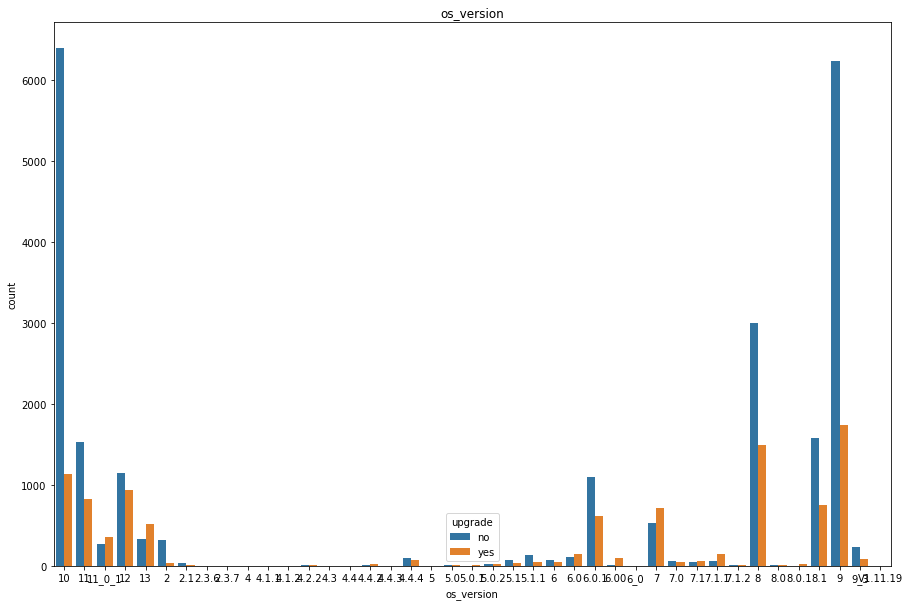

In [9]:
df = upgrade_phone_info.sort_values(by='os_version')
plt.figure(figsize=(15,10))
sns.countplot(data=df, hue="upgrade", x='os_version')
plt.title('os_version')

In [11]:
upgrade_phone_info.os_version.value_counts()

9           7976
10          7534
8           4490
11          2357
8.1         2335
12          2085
6.0.1       1720
7           1250
13           856
11_0_1       635
2            357
9_3          319
6.0          259
7.1.1        208
5.1.1        187
4.4.4        178
6            122
7.0          113
6.00         112
7.1          112
5.1          111
5.0.2         51
2.1           50
4.4.2         43
4.2.2         34
8.0           33
7.1.2         27
8.0.1         23
5.0           22
5.0.1         12
5              7
4.4            5
6_0            5
2.3.6          4
2.3.7          3
4              3
4.1.1          3
4.3            2
V1.11.19       2
4.4.3          2
4.1.2          2
Name: os_version, dtype: int64

In [ ]:
df = upgrade_phone_info_eval.sort_values(by='gsma_device_type')
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='gsma_device_type')
plt.title('gsma_device_type')

Text(0.5, 1.0, 'lte_category')

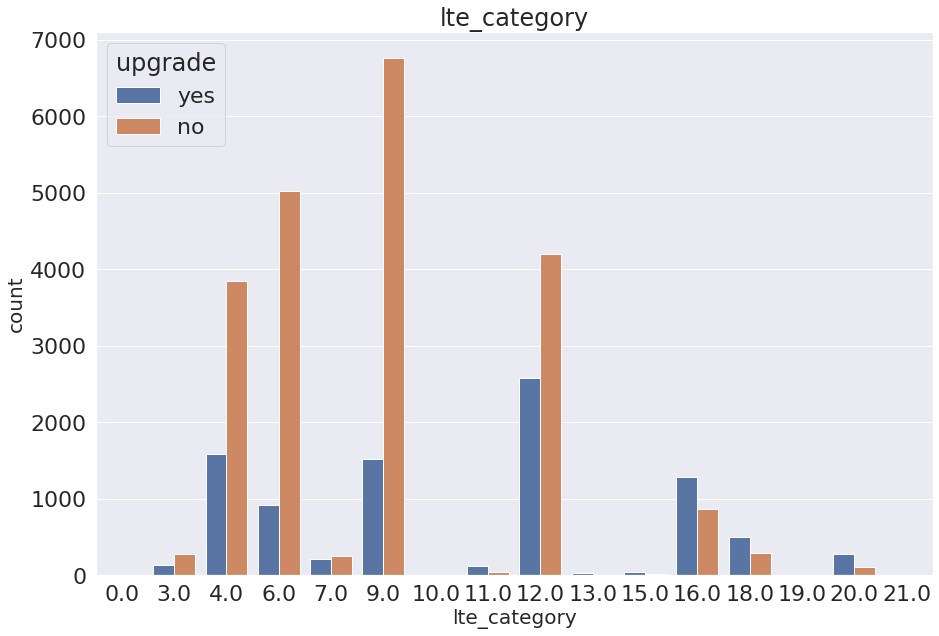

In [24]:
df = upgrade_phone_info.sort_values(by='lte_category')
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(1, 1, figsize=(15,10))
# ax = plt.subplot(111)
ax.set_xlabel('date', fontsize=20)
ax.set_ylabel('count', fontsize=20)
sns.countplot(data=df, hue='upgrade', x='lte_category')
plt.title('lte_category')

In [337]:
upgrade_phone_info[upgrade_phone_info.upgrade == 'yes'].year_released.notnull().value_counts()

True     10175
False     4999
Name: year_released, dtype: int64

Text(0.5, 1.0, 'cpu_cores')

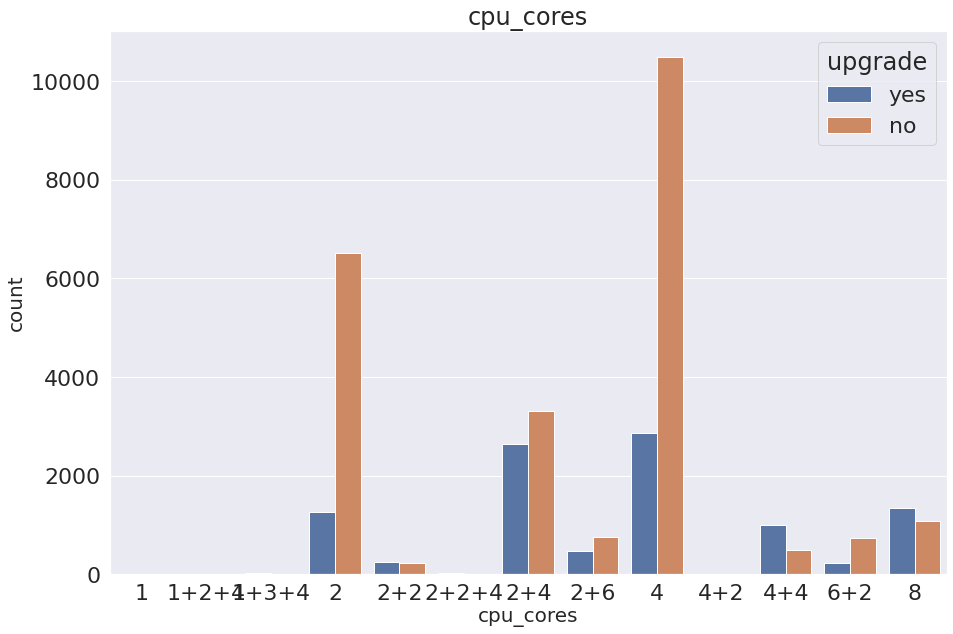

In [23]:
df = upgrade_phone_info.sort_values(by='cpu_cores')
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(1, 1, figsize=(15,10))
# ax = plt.subplot(111)
ax.set_xlabel('date', fontsize=20)
ax.set_ylabel('count', fontsize=20)
sns.countplot(data=df, hue="upgrade", x='cpu_cores')
plt.title('cpu_cores')

Text(0.5, 1.0, 'total_ram')

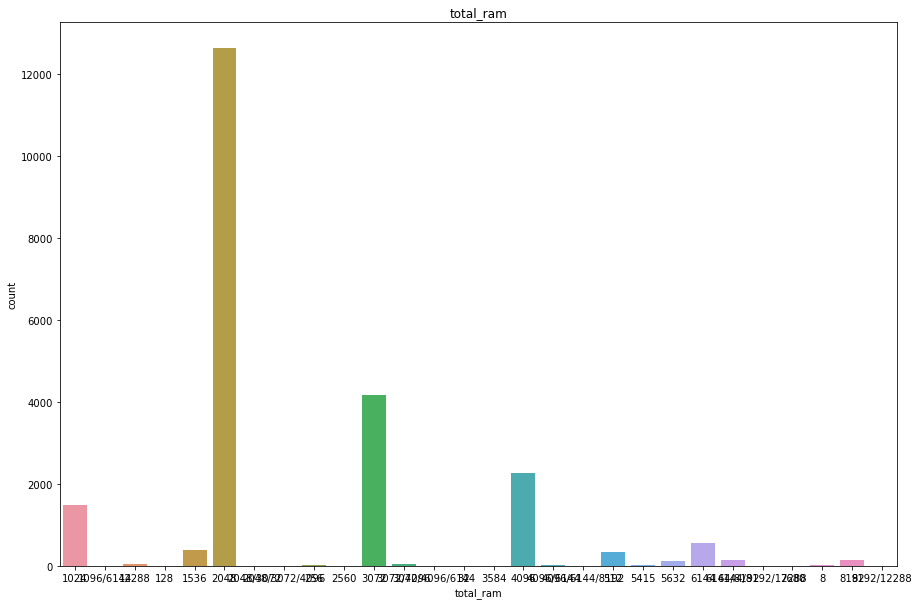

In [18]:
df = upgrade_phone_info_eval.sort_values(by='total_ram')
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='total_ram')
plt.title('total_ram')

Text(0.5, 1.0, 'expandable_storage')

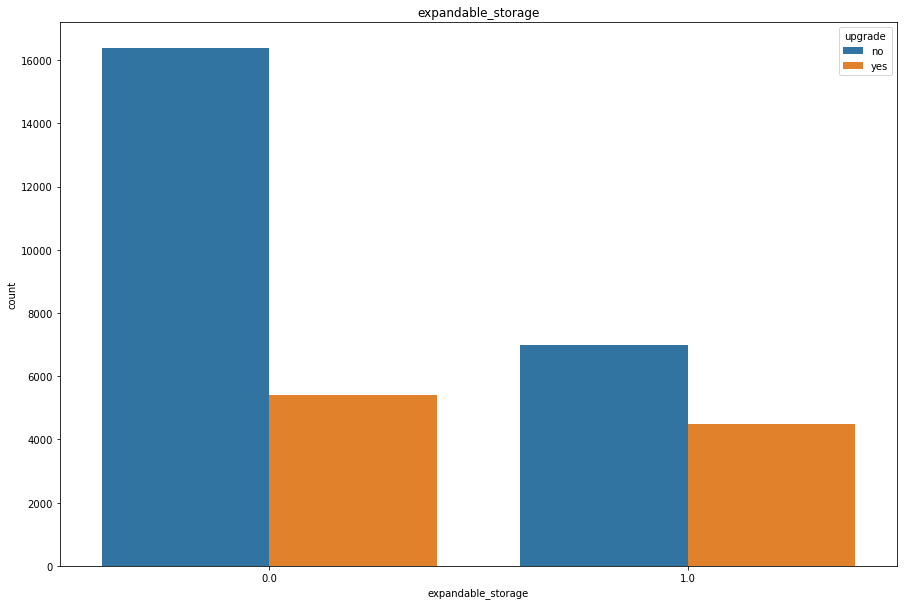

In [19]:
df = upgrade_phone_info.sort_values(by='expandable_storage')
plt.figure(figsize=(15,10))
sns.countplot(data=df, hue="upgrade", x='expandable_storage')
plt.title('expandable_storage')

Text(0.5, 1.0, 'os_vendor')

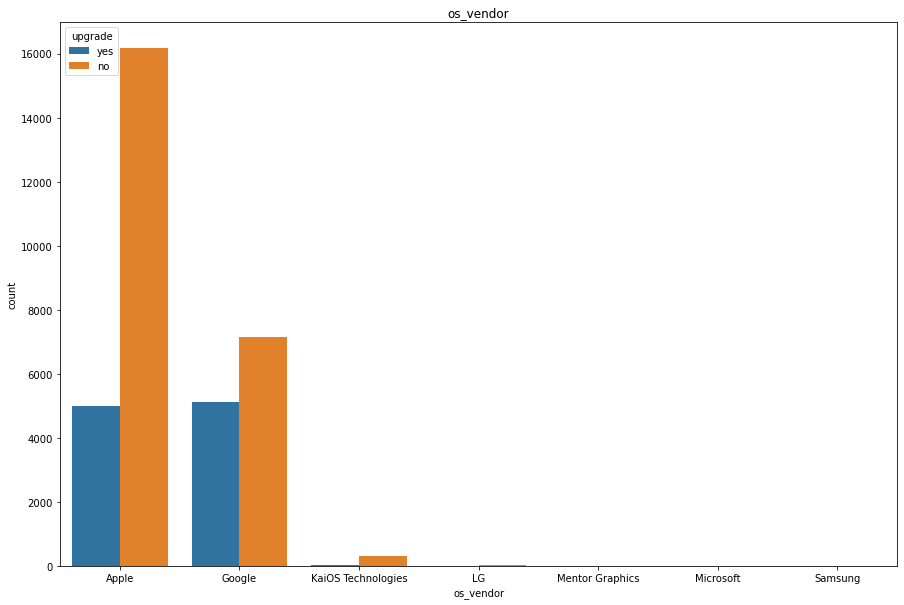

In [20]:
df = upgrade_phone_info.sort_values(by='os_vendor')
plt.figure(figsize=(15,10))
sns.countplot(data=df, hue="upgrade", x='os_vendor')
plt.title('os_vendor')

In [21]:
upgrade_phone_info['internal_storage_capacity']

0                16
1        64/128/256
2        32/128/256
3        32/128/256
4                64
            ...    
55863           NaN
55864    32/128/256
55865           NaN
55866       128/512
55867           NaN
Name: internal_storage_capacity, Length: 55868, dtype: object

In [22]:
upgrade_phone_info['gsma_model_name'].value_counts()

iPhone 7 (A1660)                5405
iPhone 6S (A1633)               3188
XT2005DL                        2311
iPhone 6S Plus (A1634)          1726
iPhone XR (A1984)               1390
                                ... 
SM-J260G/DS                        1
BV9500 Plus                        1
Passport, SQW100-1, RGY181LW       1
LM-Q710CS                          1
XT2025-1                           1
Name: gsma_model_name, Length: 868, dtype: int64

<Figure size 1080x720 with 0 Axes>

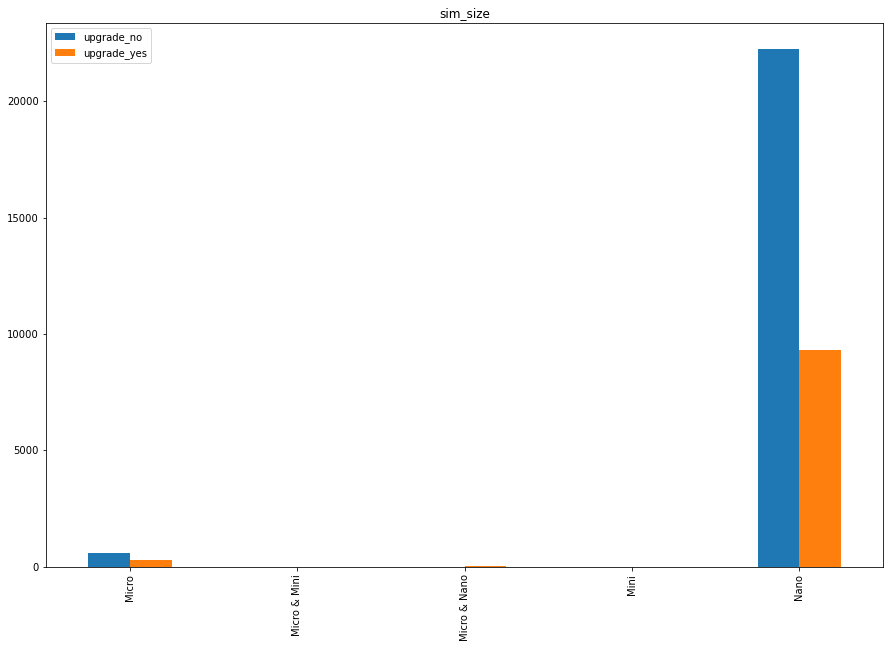

In [23]:
upgrade_phone_info_no = upgrade_phone_info.sim_size[upgrade_phone_info.upgrade == 'no'].value_counts()
upgrade_phone_info_yes = upgrade_phone_info.sim_size[upgrade_phone_info.upgrade == 'yes'].value_counts()
plt.figure(figsize=(15,10))
info = pd.DataFrame({'upgrade_no': upgrade_phone_info_no, 'upgrade_yes': upgrade_phone_info_yes})
info.plot(kind='bar',figsize=(15,10))
plt.title('sim_size')
plt.show()

Text(0.5, 1.0, 'gsma_operating_system')

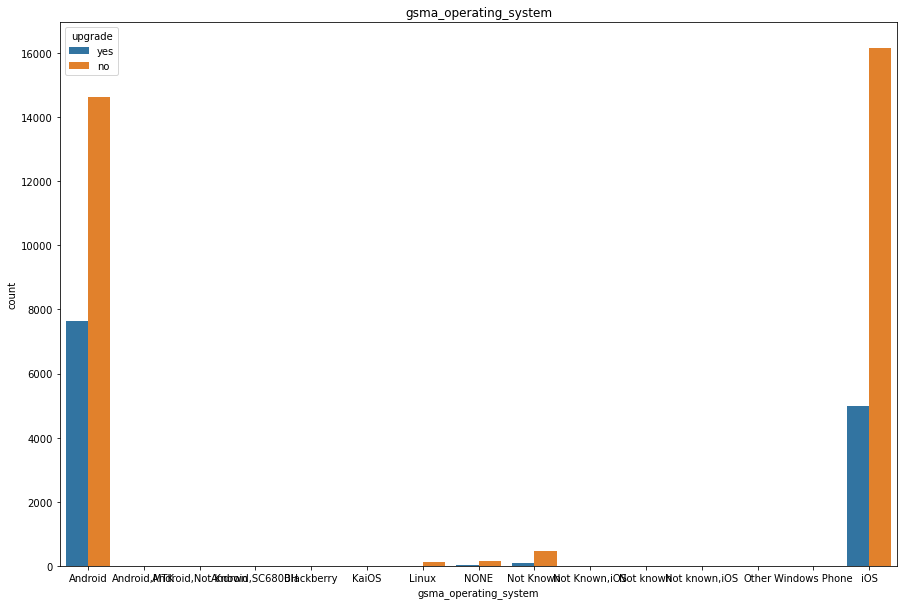

In [24]:
df = upgrade_phone_info.sort_values(by='gsma_operating_system')
plt.figure(figsize=(15,10))
sns.countplot(data=df, hue="upgrade", x='gsma_operating_system')
plt.title('gsma_operating_system')

In [25]:
upgrade_phone_info['wi_fi']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
55863    NaN
55864    1.0
55865    NaN
55866    1.0
55867    NaN
Name: wi_fi, Length: 55868, dtype: float64

Text(0.5, 1.0, 'lte_category')

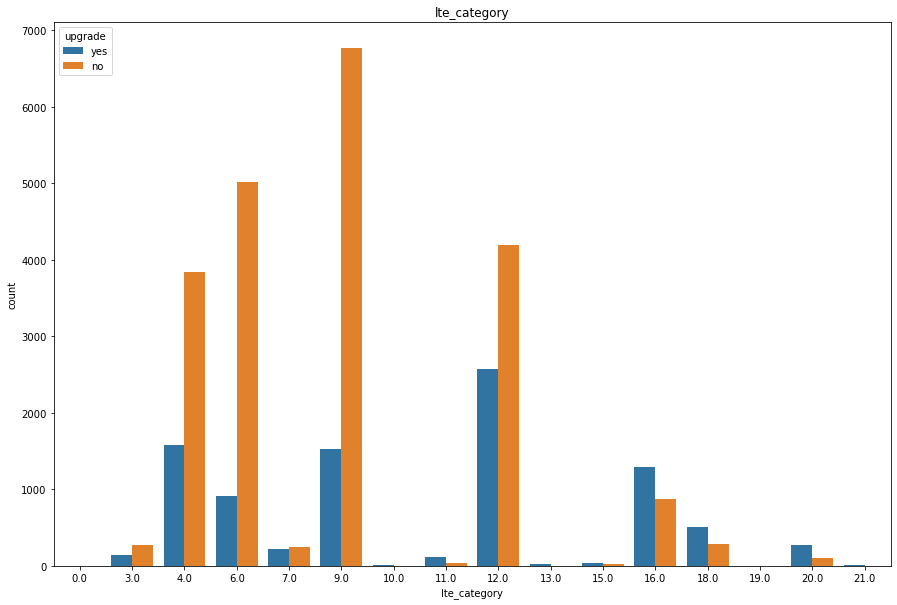

In [26]:
df = upgrade_phone_info.sort_values(by='lte_category')
plt.figure(figsize=(15,10))
sns.countplot(data=df, hue="upgrade", x='lte_category')
plt.title('lte_category')

<Figure size 1080x720 with 0 Axes>

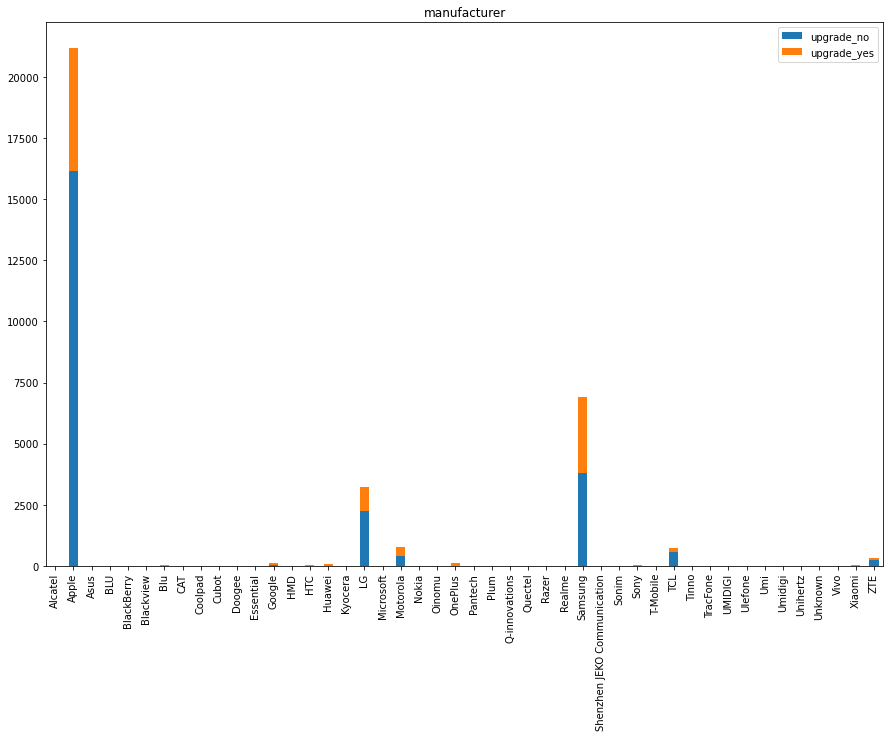

In [33]:
upgrade_phone_info_no = upgrade_phone_info.manufacturer[upgrade_phone_info.upgrade == 'no'].value_counts()
upgrade_phone_info_yes = upgrade_phone_info.manufacturer[upgrade_phone_info.upgrade == 'yes'].value_counts()
plt.figure(figsize=(15,10))
info = pd.DataFrame({'upgrade_no': upgrade_phone_info_no, 'upgrade_yes': upgrade_phone_info_yes})
info.plot(kind='bar',stacked=True,figsize=(15,10))
plt.title('manufacturer')
plt.show()

<Figure size 1080x720 with 0 Axes>

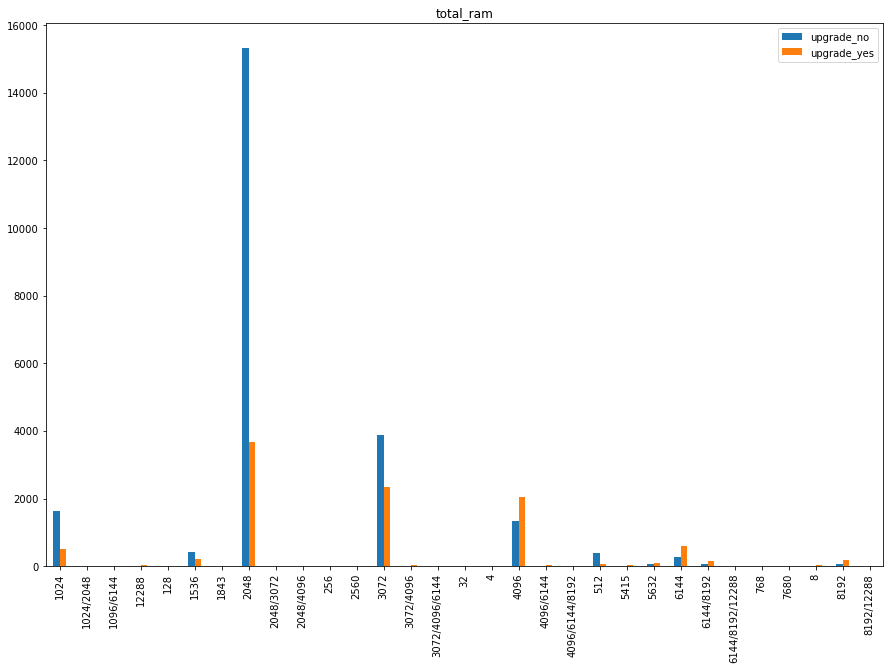

In [28]:
upgrade_phone_info_no = upgrade_phone_info.total_ram[upgrade_phone_info.upgrade == 'no'].value_counts()
upgrade_phone_info_yes = upgrade_phone_info.total_ram[upgrade_phone_info.upgrade == 'yes'].value_counts()
plt.figure(figsize=(15,10))
info = pd.DataFrame({'upgrade_no': upgrade_phone_info_no, 'upgrade_yes': upgrade_phone_info_yes})
info.plot(kind='bar',figsize=(15,10))
plt.title('total_ram')
plt.show()

<Figure size 1080x720 with 0 Axes>

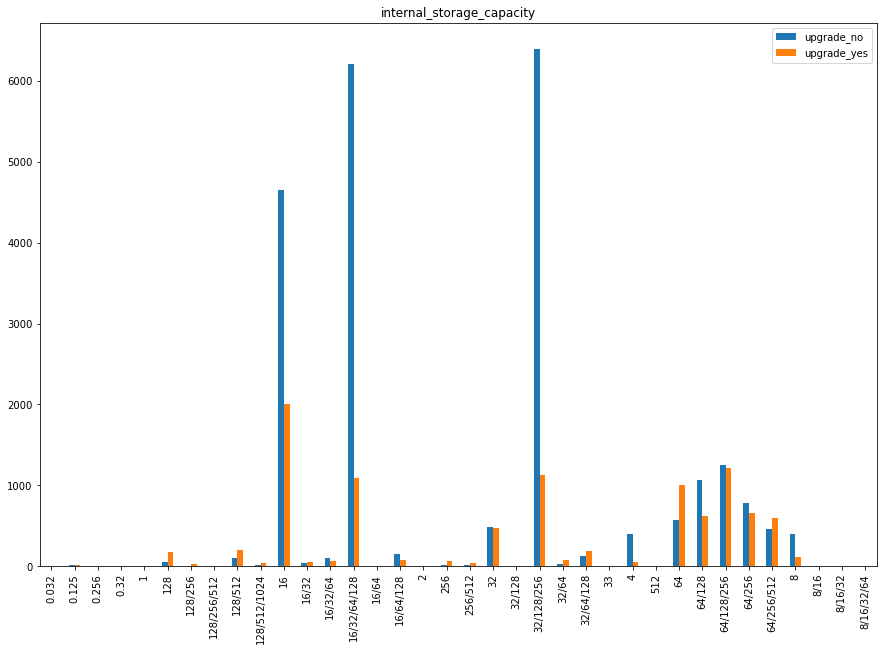

In [34]:
upgrade_phone_info_no = upgrade_phone_info.internal_storage_capacity[upgrade_phone_info.upgrade == 'no'].value_counts()
upgrade_phone_info_yes = upgrade_phone_info.internal_storage_capacity[upgrade_phone_info.upgrade == 'yes'].value_counts()
plt.figure(figsize=(15,10))
info = pd.DataFrame({'upgrade_no': upgrade_phone_info_no, 'upgrade_yes': upgrade_phone_info_yes})
info.plot(kind='bar',figsize=(15,10))
plt.title('internal_storage_capacity')
plt.show()

Text(0.5, 1.0, 'year_released')

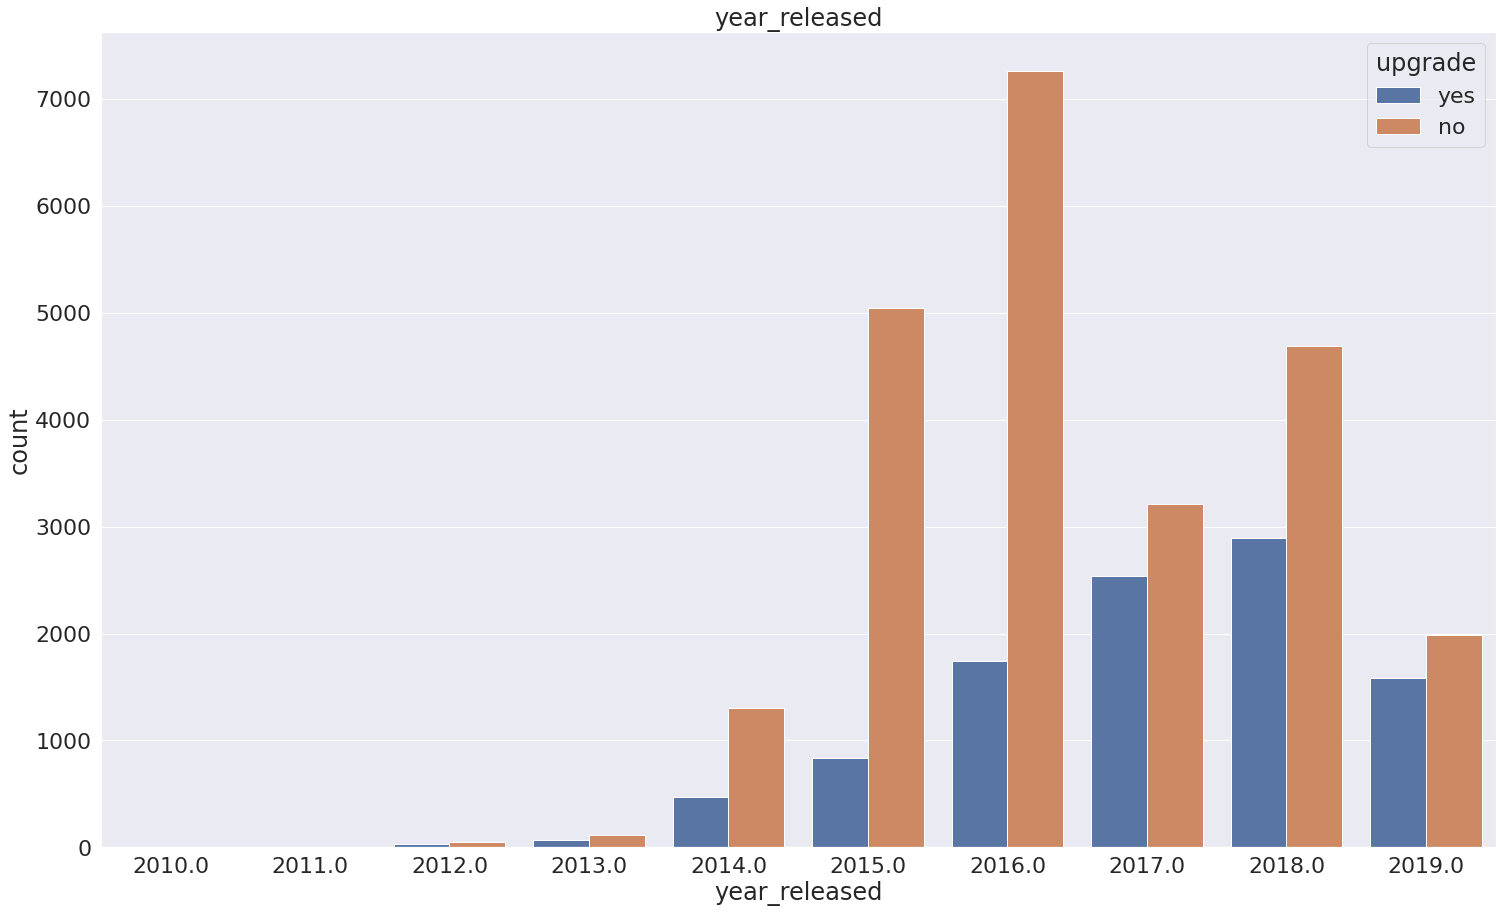

In [21]:
df = upgrade_phone_info.sort_values(by='year_released')
plt.figure(figsize=(25,15))
sns.set(font_scale=2.0)
sns.countplot(data=df, hue="upgrade", x='year_released')
plt.title('year_released')

Text(0.5, 1.0, 'os_version')

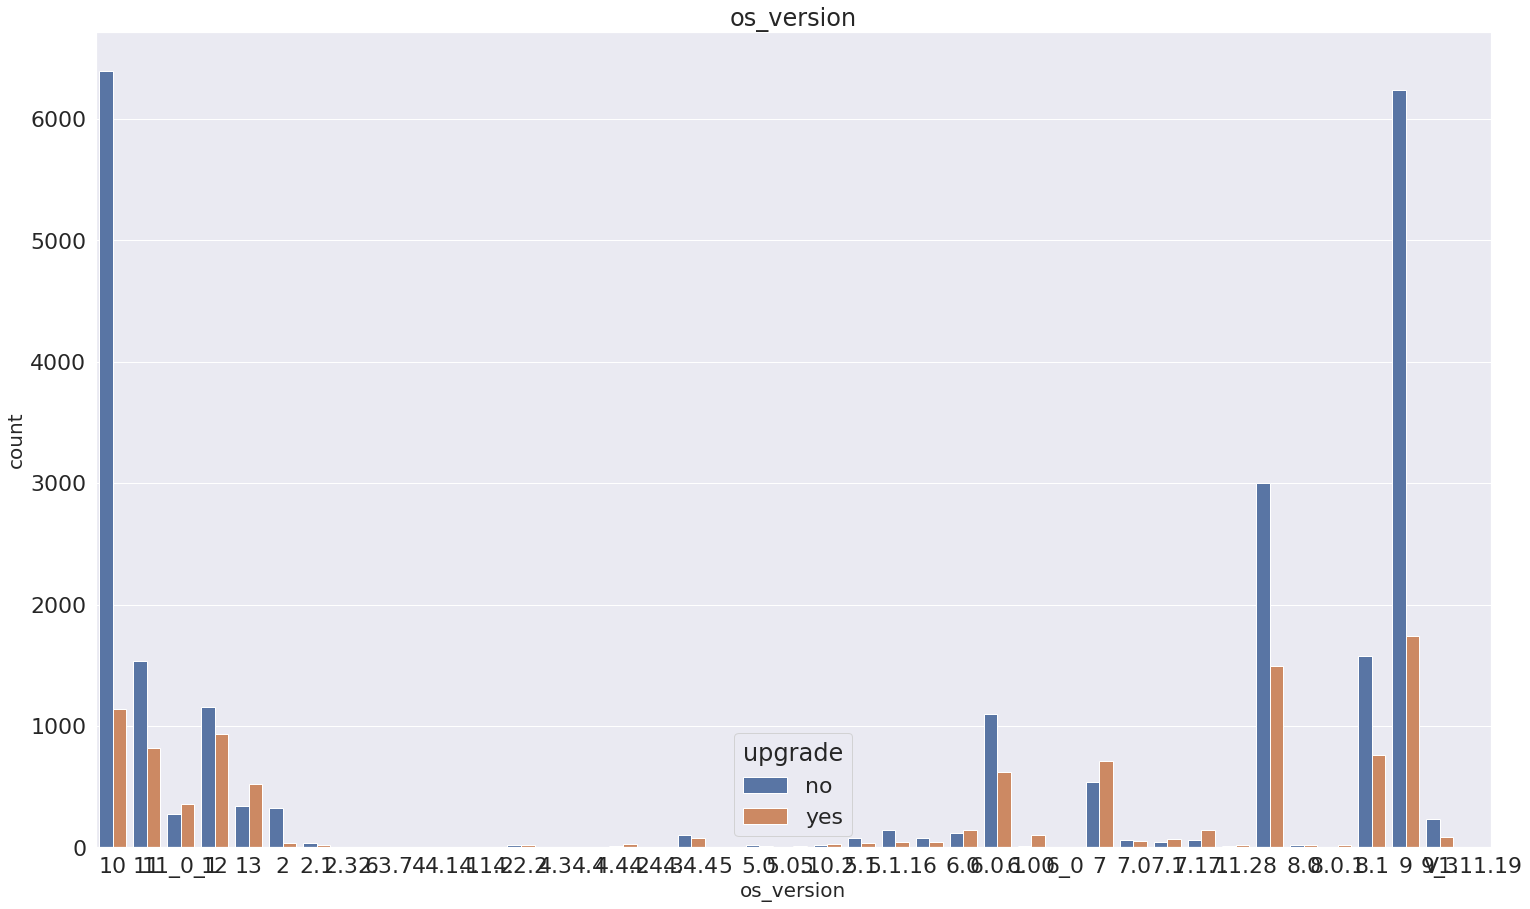

In [27]:
df = upgrade_phone_info.sort_values(by='os_version')
# plt.figure(figsize=(25,15))
fig, ax = plt.subplots(1, 1, figsize=(25,15))
# ax = plt.subplot(111)
ax.set_xlabel('date', fontsize=20)
ax.set_ylabel('count', fontsize=20)
sns.countplot(data=df, hue="upgrade", x='os_version')
plt.title('os_version')

In [29]:
# upgrades_eval=pd.read_csv(data_folder+"data/eval/upgrades.csv")
# phone_info_eval=pd.read_csv(data_folder+"data/eval/phone_info.csv")
# customer_info_eval=pd.read_csv(data_folder+"data/eval/customer_info.csv")